# import Libraries

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# load dataset

In [18]:
df = pd.read_csv("../input/customer/Test.csv")

In [19]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


1. Impute Missing Values

In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Sample data loading (replace with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Example of columns involved
numeric_cols = ['Age', 'Work_Experience', 'Family_Size', 'Spending_Score']
categorical_cols = ['Gender', 'Profession']  # Example of categorical columns

# Step 1: Handle non-numeric values in the 'Spending_Score' column
df['Spending_Score'] = df['Spending_Score'].replace({'Low': 1, 'Average': 2, 'High': 3})

# Step 2: Impute missing values in numeric columns with the mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Step 3: Impute missing values in categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Step 4: Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
encoded_categorical = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Step 5: Combine the numeric and encoded categorical columns
df_combined = pd.concat([df[numeric_cols], encoded_categorical], axis=1)

# Step 6: Apply KMeans for segmentation
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_combined)

# Step 7: View the results
print("\nKMeans clustering results with One-Hot Encoded categorical columns:")
print(df[['Age', 'Work_Experience', 'Family_Size', 'Spending_Score', 'Gender', 'Profession', 'Cluster']])


/tmp/ipykernel_24/977457733.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Spending_Score'] = df['Spending_Score'].replace({'Low': 1, 'Average': 2, 'High': 3})
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



KMeans clustering results with One-Hot Encoded categorical columns:
       Age  Work_Experience  Family_Size  Spending_Score  Gender  \
0     36.0         0.000000          1.0             1.0  Female   
1     37.0         8.000000          4.0             2.0    Male   
2     69.0         0.000000          1.0             1.0  Female   
3     59.0        11.000000          2.0             3.0    Male   
4     19.0         2.552587          4.0             1.0  Female   
...    ...              ...          ...             ...     ...   
2622  29.0         9.000000          4.0             1.0    Male   
2623  35.0         1.000000          1.0             1.0  Female   
2624  53.0         2.552587          2.0             1.0  Female   
2625  47.0         1.000000          5.0             3.0    Male   
2626  43.0         9.000000          3.0             1.0  Female   

         Profession  Cluster  
0          Engineer        2  
1        Healthcare        2  
2            Artist  

In [24]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,458989,Female,Yes,36.0,Yes,Engineer,0.000000,1.0,1.0,Cat_6,2
1,458994,Male,Yes,37.0,Yes,Healthcare,8.000000,2.0,4.0,Cat_6,2
2,458996,Female,Yes,69.0,No,Artist,0.000000,1.0,1.0,Cat_6,1
3,459000,Male,Yes,59.0,No,Executive,11.000000,3.0,2.0,Cat_6,1
4,459001,Female,No,19.0,No,Marketing,2.552587,1.0,4.0,Cat_6,0
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29.0,No,Healthcare,9.000000,1.0,4.0,Cat_6,0
2623,467958,Female,No,35.0,Yes,Doctor,1.000000,1.0,1.0,Cat_6,0
2624,467960,Female,No,53.0,Yes,Entertainment,2.552587,1.0,2.0,Cat_6,2
2625,467961,Male,Yes,47.0,Yes,Executive,1.000000,3.0,5.0,Cat_4,2


In [25]:
df.to_csv("project_ready_dataset.csv",index=False)

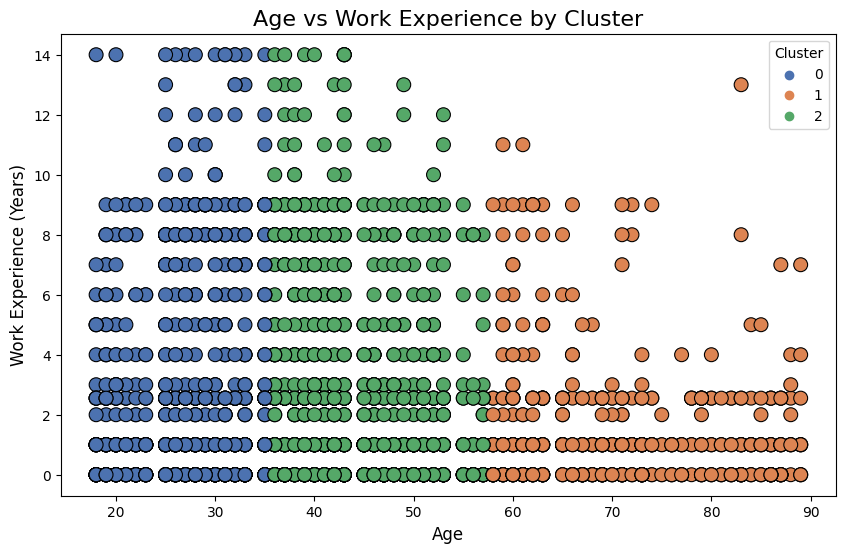

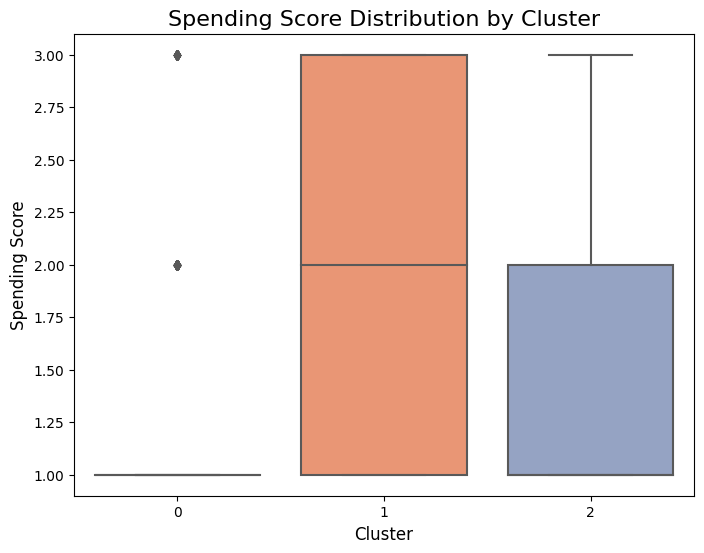

In [26]:
# Create a scatter plot of Age vs Work_Experience, colored by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Work_Experience', hue='Cluster', palette='deep', s=100, edgecolor='black')

# Add labels and title
plt.title('Age vs Work Experience by Cluster', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Work Experience (Years)', fontsize=12)

# Show the plot
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Create a boxplot for Spending Score by Cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Cluster', y='Spending_Score', palette='Set2')

# Add labels and title
plt.title('Spending Score Distribution by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)

# Show the plot
plt.show()